# Convolución

En procesamiento de imagen, un núcleo, kernel, matriz de convolución o máscara es una matriz pequeña que se utiliza para desenfoque, enfoque, realce, detección de bordes y más. Esto se logra realizando una convolución entre un núcleo y una imagen.

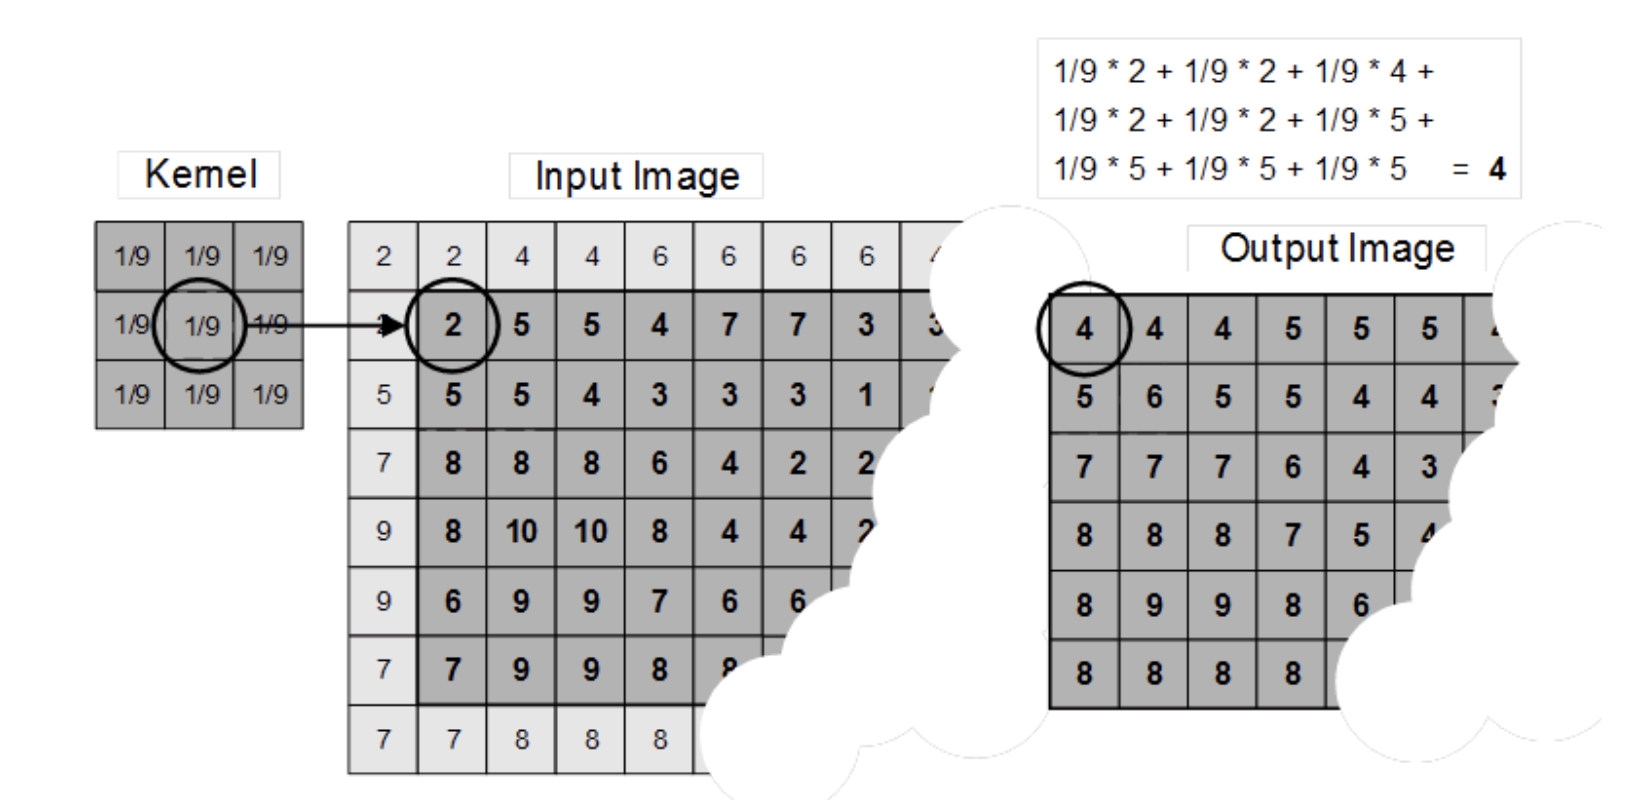

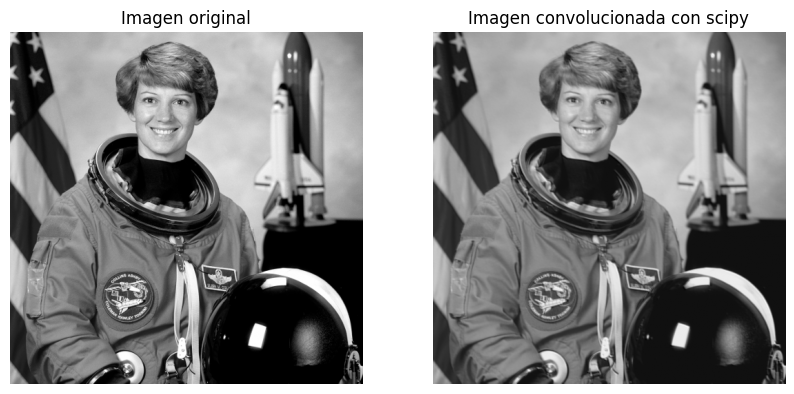

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from scipy.ndimage import convolve

# Cargar imagen de ejemplo y convertir a escala de grises
image = color.rgb2gray(data.astronaut())

# Definir un kernel (filtro) de convolución simple, por ejemplo, un filtro suavizado
kernel = np.array([[1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1]]) / 9.0  # Normalizamos el kernel

# Filtro Sobel (Sobel Filter)
# Detecta cambios de intensidad en las direcciones horizontal y vertical.

#Sobel en dirección x:
kernel = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]]) # Detección de bordes horizontal Sobel

# Sobel en dirección y:
kernel = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]])  # Detección de bordes vertical Sobel
#Filtro Laplaciano
#El filtro laplaciano también se utiliza para la detección de bordes, calculando la segunda derivada de la imagen.
kernel = np.array([[ 0, -1,  0],
                            [-1,  4, -1],
                            [ 0, -1,  0]])  # Detección de bordes laplaciana

#Filtro de Afilar (Sharpening Filter)
#Este filtro se utiliza para resaltar los bordes y dar una apariencia más nítida a la imagen.
kernel = np.array([[ 0, -1,  0],
                    [-1,  5, -1],
                    [ 0, -1,  0]])  # Filtro de afilado
#Filtro de Realce de Bordes (Edge Enhancement Filter)
#Este filtro resalta los bordes en una imagen, haciendo que se noten más.
kernel = np.array([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1]])  # Realce de bordes
#Filtro de Emboss (Emboss Filter)
#Este filtro da una apariencia de relieve a la imagen, creando un efecto de sombra en una dirección
kernel = np.array([[-2, -1, 0],
                    [-1,  1, 1],
                    [ 0,  1, 2]])  # Filtro de emboss

kernel = (np.random.rand(3,3)*2 - 1) * 10   # Kernel aleatorio 3x3 en el rango [-1, 1]


# Aplicar la convolución a la imagen
convolved_image = convolve(image, kernel)

# Mostrar la imagen original y la imagen convolucionada
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(image, cmap='gray')
ax1.set_title('Imagen original')
ax1.axis('off')

ax2.imshow(convolved_image, cmap='gray')
ax2.set_title('Imagen convolucionada con scipy')
ax2.axis('off')

plt.show()

In [143]:
(np.random.rand(3,3)*2 - 1)*10

array([[-4.19433073, -2.79036638,  8.44030984],
       [ 1.37892457,  8.57226458, -9.66069108],
       [-0.94755196, -0.74163961, -4.97797024]])

# Lectura y visualización de imágenes

- Objetivo: Cargar una imagen desde un archivo y mostrarla utilizando matplotlib.
- Función clave: io.imread, io.imshow.
- Ejercicio: Carga una imagen de tu elección y muestra tanto la imagen original como la imagen en escala de grises.

Explicación: Este ejercicio te enseña a cargar y visualizar imágenes en Python. io.imread se utiliza para cargar la imagen desde un archivo o una URL, mientras que io.imshow y matplotlib te permiten visualizar la imagen cargada. Convertir la imagen a escala de grises es útil para simplificar el procesamiento de imágenes.



In [106]:
3 + 3j +  3 + 2j

(6+5j)

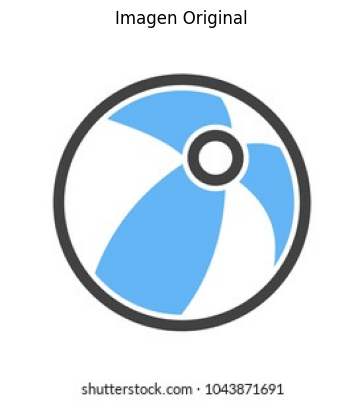

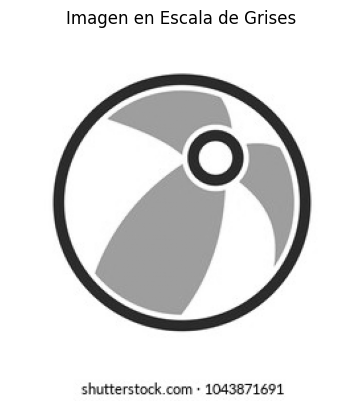

In [105]:
from skimage import io
import matplotlib.pyplot as plt

# Cargar la imagen
image = io.imread('https://image.shutterstock.com/image-photo/colorful-background-beautiful-water-drop-260nw-1043871691.jpg')

# Mostrar la imagen original
plt.imshow(image)
plt.title('Imagen Original')
plt.axis('off')
plt.show()

# Convertir a escala de grises y mostrar
gray_image = io.imread('https://image.shutterstock.com/image-photo/colorful-background-beautiful-water-drop-260nw-1043871691.jpg', as_gray=True)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen en Escala de Grises')
plt.axis('off')
plt.show()


# Conversión entre diferentes espacios de color

- Objetivo: Convertir una imagen de un espacio de color a otro (por ejemplo, de RGB a HSV).
- Función clave: color.rgb2hsv, color.rgb2gray.
- Ejercicio: Convierte una imagen de color en una imagen en escala de grises y en un espacio de color HSV. Visualiza las diferentes capas de la imagen HSV por separado.

Explicación: Este ejercicio aborda la manipulación de imágenes en diferentes espacios de color. El espacio HSV (Hue, Saturation, Value) es útil para segmentación de color y procesamiento basado en color. color.rgb2hsv convierte la imagen de RGB a HSV, mientras que color.rgb2gray la convierte a escala de grises. Luego, se pueden visualizar las diferentes capas del espacio HSV para análisis detallado.

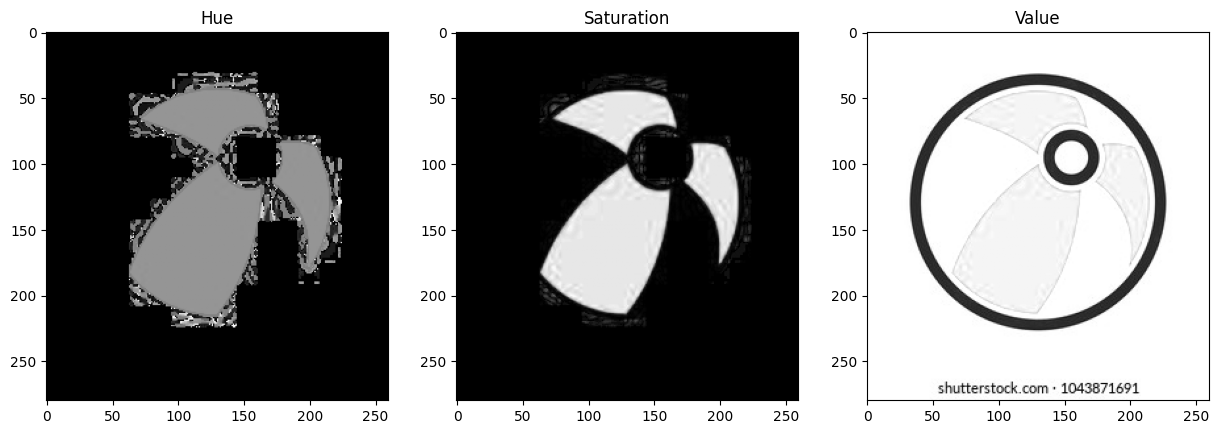

In [157]:
from skimage import color, io
import matplotlib.pyplot as plt

# Cargar la imagen
image = io.imread('https://image.shutterstock.com/image-photo/colorful-background-beautiful-water-drop-260nw-1043871691.jpg')

# Convertir de RGB a HSV
hsv_image = color.rgb2hsv(image)

# Mostrar las diferentes capas de HSV
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(hsv_image[:, :, 0], cmap='gray')
ax[0].set_title('Hue')
ax[1].imshow(hsv_image[:, :, 1], cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(hsv_image[:, :, 2], cmap='gray')
ax[2].set_title('Value')
plt.show()


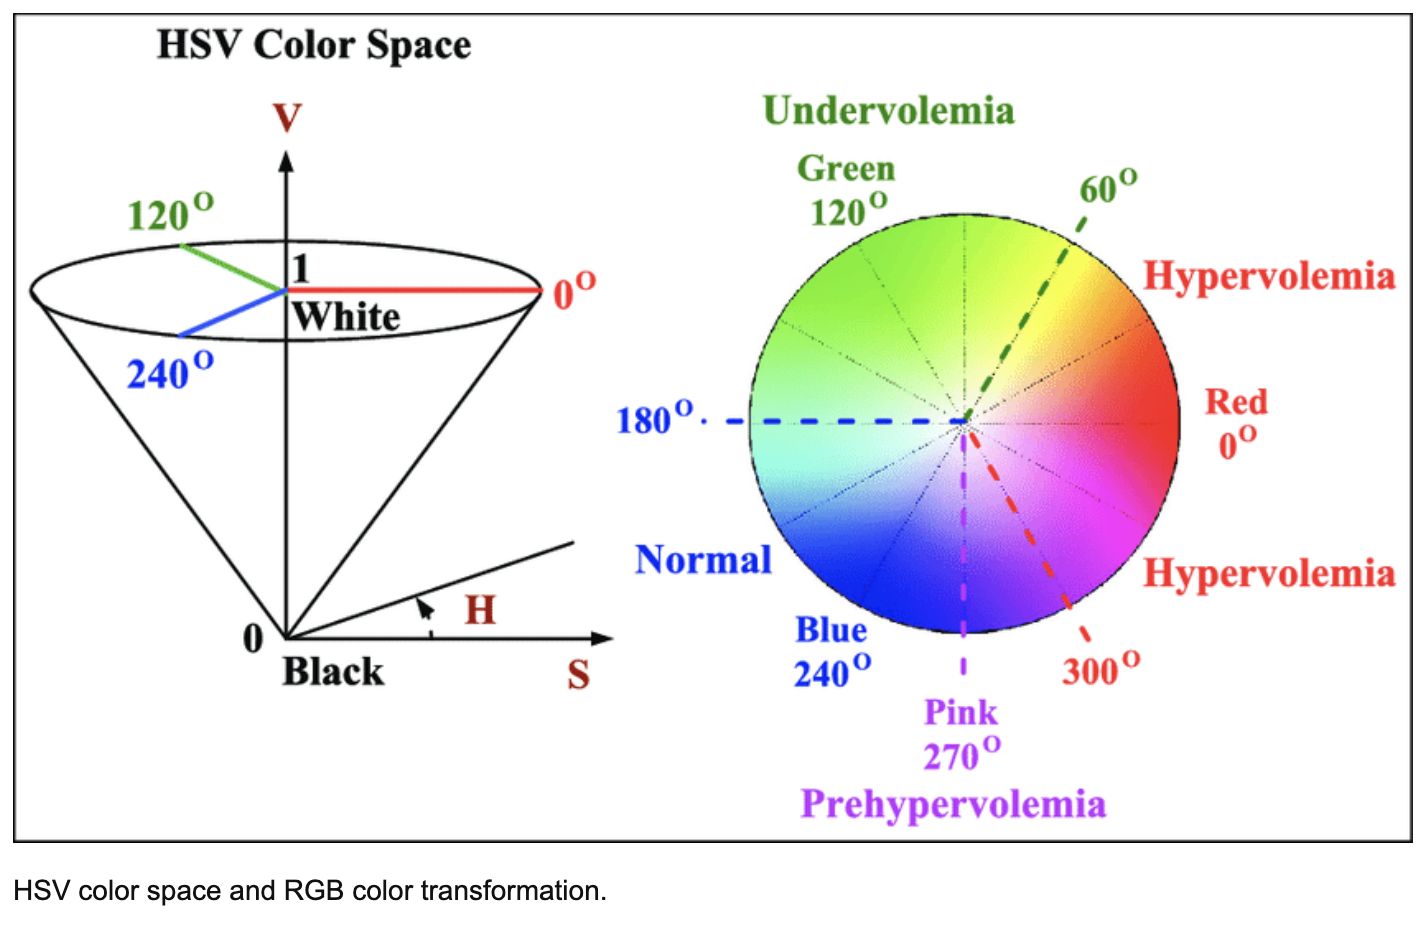

Componentes del modelo HSV:

- Matiz (Hue): Es el tono del color, representado por un ángulo en un círculo de colores. Determina si el color es rojo, azul, verde, etc.
- Saturación: Indica la intensidad o pureza del color. Un color saturado es vibrante y puro, mientras que un color menos saturado se acerca al gris.
- Valor (o Brillo): Define la claridad u oscuridad del color. Un valor alto indica un color claro, mientras que un valor bajo indica un color oscuro.

# Filtrado y suavizado de imágenes

- Objetivo: Aplicar filtros de suavizado para reducir el ruido en una imagen.
- Función clave: filters.gaussian, filters.median.
- Ejercicio: Aplica diferentes filtros de suavizado (Gaussian, median) a una imagen ruidosa y compara los resultados.


Explicación: En este ejercicio, aprenderás a reducir el ruido en las imágenes mediante el uso de filtros de suavizado. El filtro Gaussiano (filters.gaussian) es ideal para reducir el ruido aleatorio, mientras que el filtro mediano (filters.median) es efectivo para eliminar el ruido impulsivo, como los saltos de intensidad. Comparar estos métodos te ayudará a entender cuál es más efectivo en diferentes situaciones.


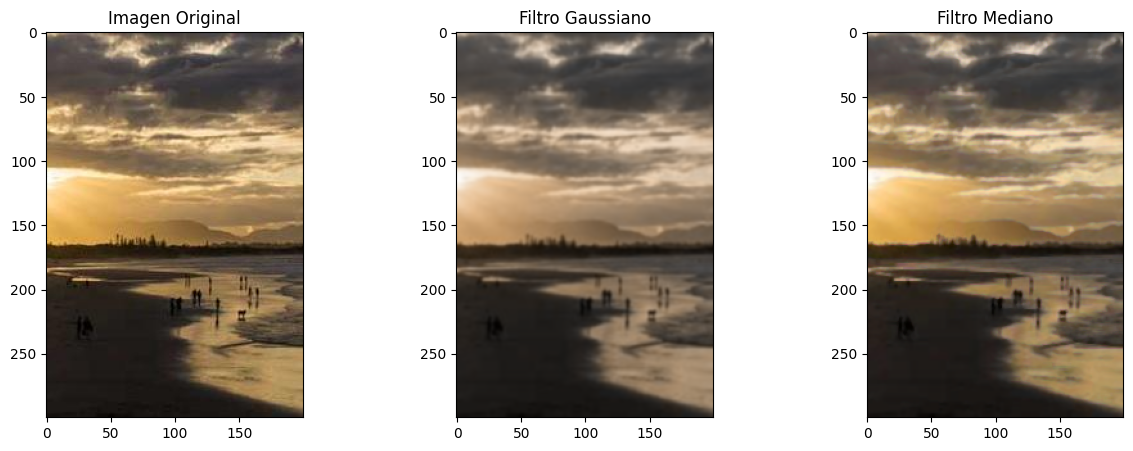

In [159]:
from skimage import filters, io
import matplotlib.pyplot as plt

# Cargar una imagen con ruido
image = io.imread('https://picsum.photos/200/300')

# Aplicar filtro Gaussiano
gaussian_image = filters.gaussian(image, sigma=1)

# Aplicar filtro Mediano
median_image = filters.median(image)

# Mostrar las imágenes
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image)
ax[0].set_title('Imagen Original')
ax[1].imshow(gaussian_image)
ax[1].set_title('Filtro Gaussiano')
ax[2].imshow(median_image)
ax[2].set_title('Filtro Mediano')
plt.show()

# Detección de bordes

- Objetivo: Identificar los bordes en una imagen utilizando métodos como Canny, Sobel o Prewitt.
- Función clave: filters.sobel, filters.prewitt, feature.canny.
- Ejercicio: Aplica el detector de bordes de Canny a una imagen y compara los resultados con los métodos de Sobel y Prewitt.

 Explicación: La detección de bordes es crucial en la visión por computadora para identificar los contornos de los objetos. Este ejercicio utiliza el detector de Canny (feature.canny), que es efectivo en la detección de bordes fuertes, y lo compara con los filtros de Sobel (filters.sobel) y Prewitt (filters.prewitt), que detectan cambios graduales en la intensidad.

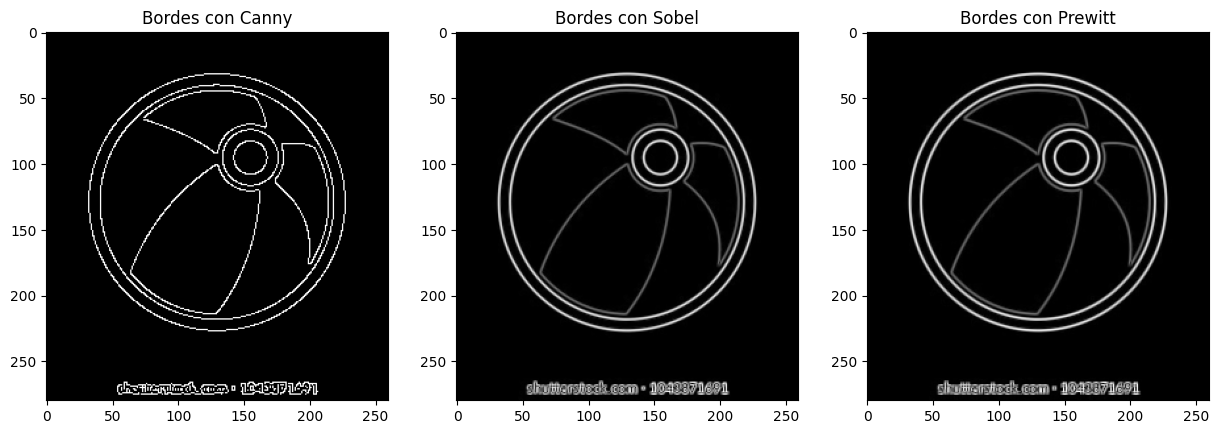

In [162]:
from skimage import filters, feature, io
import matplotlib.pyplot as plt

# Cargar la imagen
image = io.imread('https://image.shutterstock.com/image-photo/colorful-background-beautiful-water-drop-260nw-1043871691.jpg', as_gray=True)

# Aplicar detector de bordes de Canny
edges_canny = feature.canny(image)

# Aplicar filtro Sobel
edges_sobel = filters.sobel(image)

# Aplicar filtro Prewitt
edges_prewitt = filters.prewitt(image)

# Mostrar las imágenes de bordes
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(edges_canny, cmap='gray')
ax[0].set_title('Bordes con Canny')
ax[1].imshow(edges_sobel, cmap='gray')
ax[1].set_title('Bordes con Sobel')
ax[2].imshow(edges_prewitt, cmap='gray')
ax[2].set_title('Bordes con Prewitt')
plt.show()


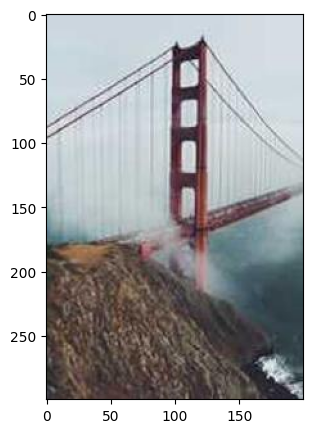

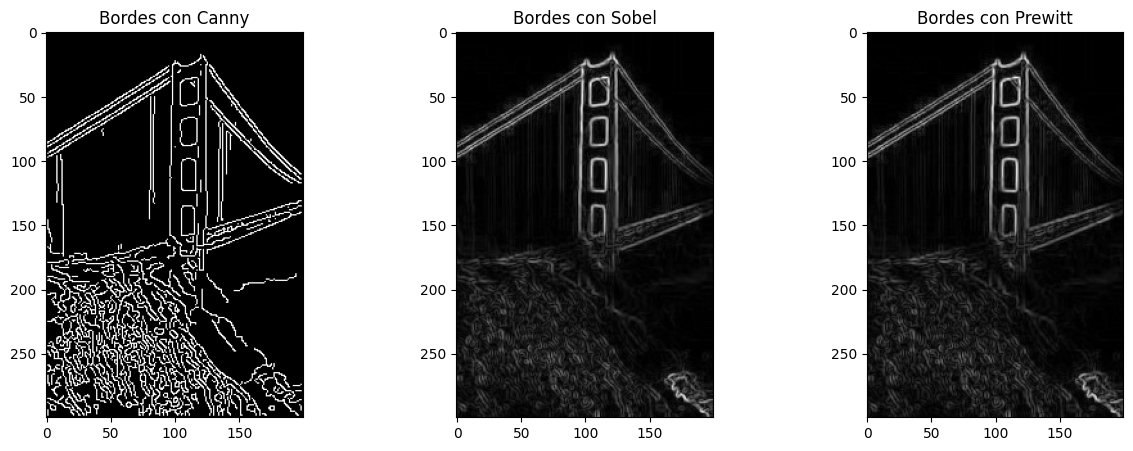

In [161]:
from skimage import filters, feature, io
import matplotlib.pyplot as plt

# Cargar la imagen
image = io.imread('https://picsum.photos/200/300')
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.imshow(image)

image = color.rgb2gray(image)

# Aplicar detector de bordes de Canny
edges_canny = feature.canny(image)

# Aplicar filtro Sobel
edges_sobel = filters.sobel(image)

# Aplicar filtro Prewitt
edges_prewitt = filters.prewitt(image)

# Mostrar las imágenes de bordes

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(edges_canny, cmap='gray')
ax[0].set_title('Bordes con Canny')
ax[1].imshow(edges_sobel, cmap='gray')
ax[1].set_title('Bordes con Sobel')
ax[2].imshow(edges_prewitt, cmap='gray')
ax[2].set_title('Bordes con Prewitt')
plt.show()


# Segmentación de imágenes

- Objetivo: Dividir una imagen en regiones significativas basadas en características como color o intensidad.
- Función clave: segmentation.slic, segmentation.felzenszwalb.
- Ejercicio: Realiza una segmentación de una imagen utilizando SLIC (Simple Linear Iterative Clustering) y visualiza las diferentes regiones segmentadas.

Explicación: La segmentación de imágenes es el proceso de dividir una imagen en múltiples segmentos o regiones para simplificar o cambiar la representación de una imagen. segmentation.slic es un método popular que agrupa píxeles basados en la proximidad en el espacio y la similitud de color. Este ejercicio te ayudará a entender cómo dividir una imagen en partes significativas.



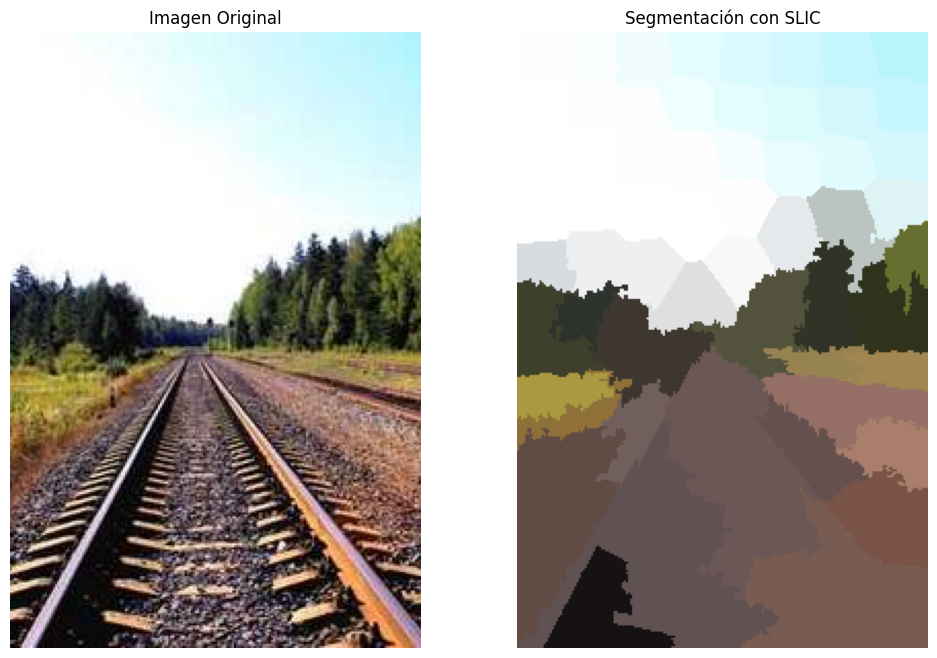

In [166]:
from skimage import segmentation, io, color
import matplotlib.pyplot as plt

# Cargar la imagen
image = io.imread('https://picsum.photos/200/300')


# Aplicar SLIC para la segmentación
segments = segmentation.slic(image, n_segments=100, compactness=10)

# Mostrar la segmentación sobre la imagen
segmented_image = color.label2rgb(segments, image, kind='avg')

fig = plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Imagen Original')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmentación con SLIC')
plt.axis('off')
plt.show()


# Transformaciones geométricas

- Objetivo: Aplicar transformaciones geométricas como rotación, escalado, y traslación a una imagen.
- Función clave: transform.rotate, transform.rescale.
- Ejercicio: Rota y escala una imagen, luego compara el resultado con la imagen original.

Explicación: Las transformaciones geométricas son operaciones fundamentales en el procesamiento de imágenes que permiten rotar, escalar o traducir una imagen en el espacio. Este ejercicio utiliza transform.rotate para rotar la imagen y transform.rescale para cambiar su tamaño, lo que es útil en aplicaciones de preprocesamiento de imágenes y ajuste de datos.

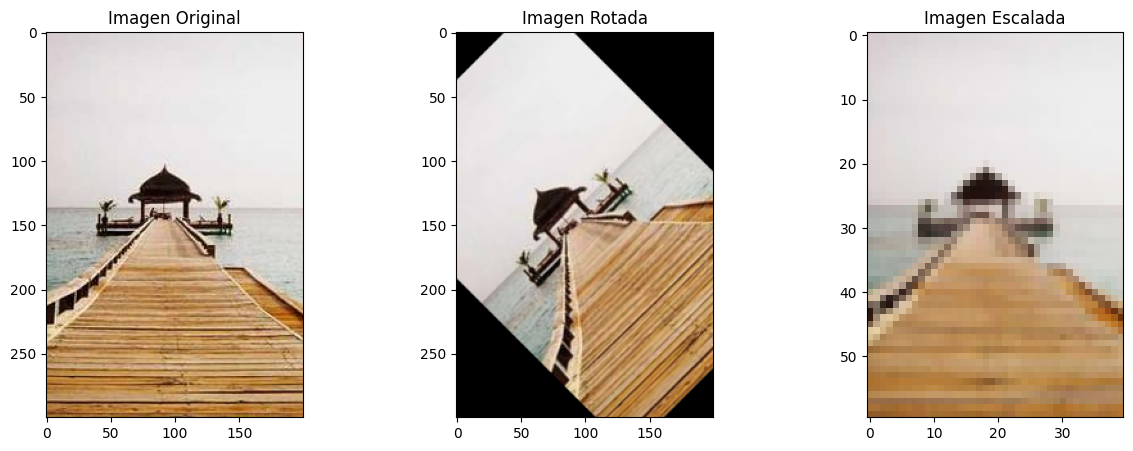

In [169]:
from skimage import transform, io
import matplotlib.pyplot as plt

# Cargar la imagen
image = io.imread('https://picsum.photos/200/300')


# Rotar la imagen 45 grados
rotated_image = transform.rotate(image, angle=45)

# Escalar la imagen
scaled_image = transform.rescale(image, scale=0.2,channel_axis= -1)

# Mostrar las imágenes transformadas
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image)
ax[0].set_title('Imagen Original')
ax[1].imshow(rotated_image)
ax[1].set_title('Imagen Rotada')
ax[2].imshow(scaled_image)
ax[2].set_title('Imagen Escalada')
plt.show()


# Morfología matemática

- Objetivo: Aplicar operaciones morfológicas como dilatación, erosión, apertura y cierre para modificar la estructura de una imagen binaria.
- Función clave: morphology.dilation, morphology.erosion.
- Ejercicio: Aplica operaciones morfológicas en una imagen binaria para mejorar la estructura de los objetos dentro de la imagen.

Explicación: La morfología matemática es una técnica que se utiliza para el análisis y procesamiento de estructuras geométricas en imágenes. En este ejercicio, aprenderás a modificar la forma y la estructura de objetos en una imagen binaria utilizando operaciones como dilatación y erosión, que son fundamentales para mejorar la calidad de las imágenes segmentadas.


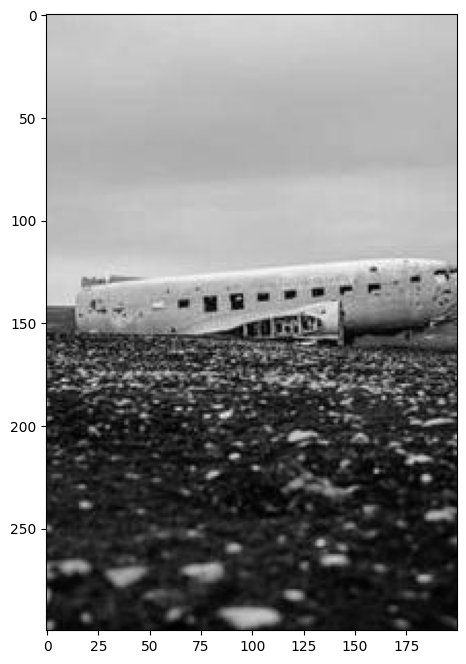

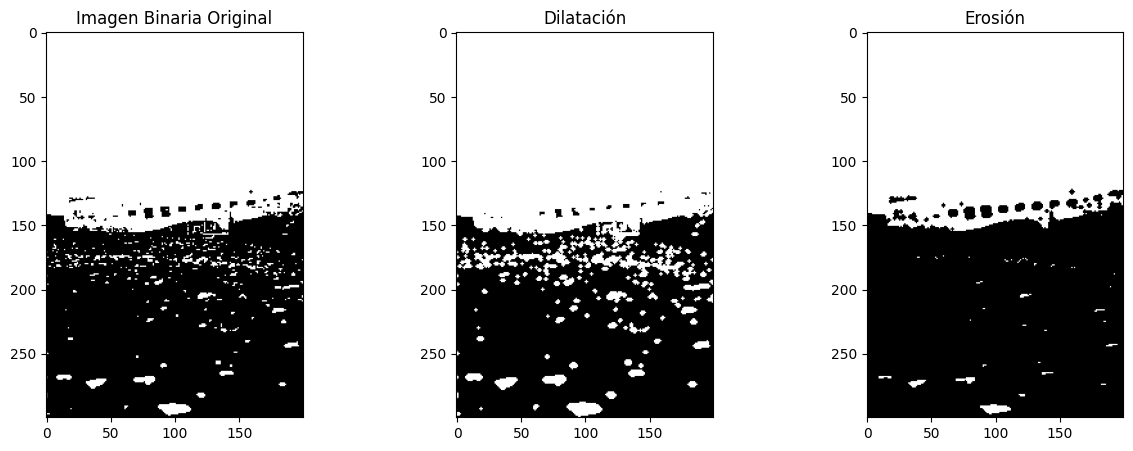

In [170]:
from skimage import morphology, io
import matplotlib.pyplot as plt

# Cargar una imagen binaria
image = io.imread('https://picsum.photos/200/300', as_gray=True)

fig = plt.figure(figsize=(12, 8))
plt.imshow(image, cmap='gray')
binary_image = image > 0.5

# Aplicar dilatación y erosión
dilated_image = morphology.dilation(binary_image)
eroded_image = morphology.erosion(binary_image)

# Mostrar las imágenes
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(binary_image, cmap='gray')
ax[0].set_title('Imagen Binaria Original')
ax[1].imshow(dilated_image, cmap='gray')
ax[1].set_title('Dilatación')
ax[2].imshow(eroded_image, cmap='gray')
ax[2].set_title('Erosión')
plt.show()


# Detección de características (features)

- Objetivo: Detectar características interesantes en una imagen como esquinas o puntos clave.
- Función clave: feature.corner_harris, feature.corner_peaks.
- Ejercicio: Detecta y visualiza las esquinas de una imagen utilizando el detector de esquinas de Harris.

Explicación: La detección de características es crucial para aplicaciones de visión por computadora como la correspondencia de imágenes, seguimiento de objetos y reconocimiento. Este ejercicio utiliza el detector de esquinas de Harris (feature.corner_harris) para identificar puntos de interés en una imagen, como esquinas, que son útiles para el análisis estructural de la imagen.



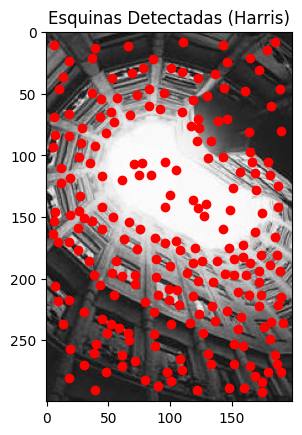

In [34]:
from skimage import feature, io
import matplotlib.pyplot as plt

# Cargar la imagen
#image = io.imread('691.jpg', as_gray=True)

# Detectar esquinas utilizando el detector de Harris
corners = feature.corner_harris(image)
coords = feature.corner_peaks(corners, min_distance=5)

# Mostrar la imagen con las esquinas detectadas
fig, ax = plt.subplots()
ax.imshow(image, cmap='gray')
ax.plot(coords[:, 1], coords[:, 0], 'ro')
ax.set_title('Esquinas Detectadas (Harris)')
plt.show()


# Transformada de Hough

- Objetivo: Detectar formas geométricas como líneas o círculos en una imagen.
- Función clave: transform.hough_line, transform.hough_circle.
- Ejercicio: Aplica la transformada de Hough para detectar líneas rectas en una imagen de bordes.

Explicación: La transformada de Hough es una técnica de detección de formas que se utiliza para identificar líneas o círculos en imágenes. Este ejercicio te enseña a aplicar transform.hough_line para detectar líneas rectas, lo cual es útil en aplicaciones como la detección de carriles en imágenes de carreteras o la identificación de estructuras lineales en imágenes arquitectónicas.



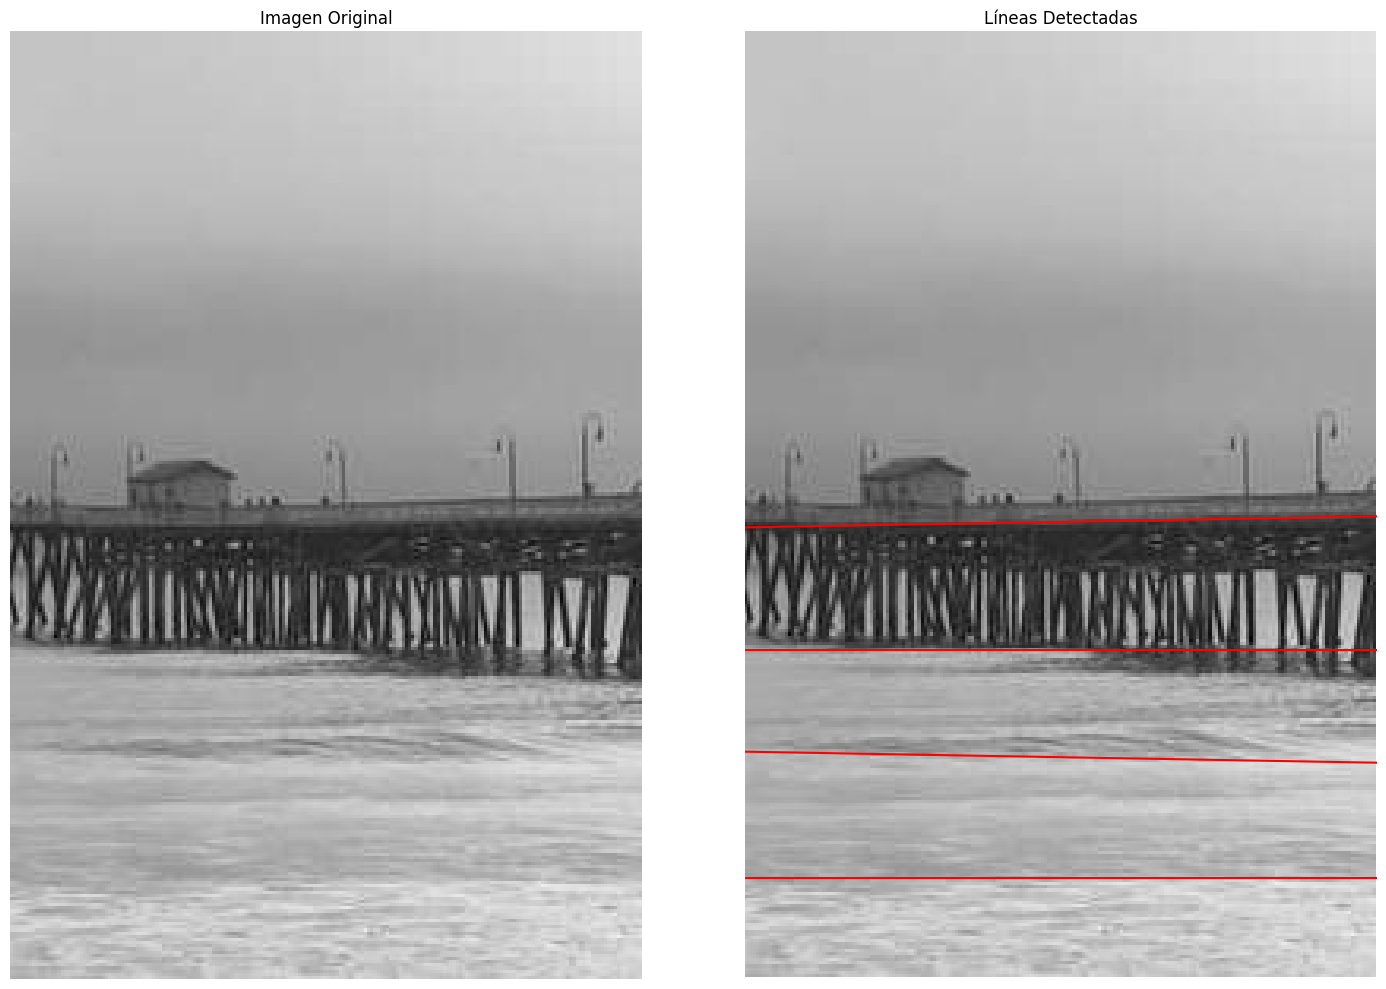

In [130]:
import matplotlib.pyplot as plt
from skimage import io, color, feature
from skimage.transform import hough_line, hough_line_peaks

# Cargar la imagen
image = image = io.imread('.jpg')
gray_image = color.rgb2gray(image)  # Convertir a escala de grises

# Detectar bordes utilizando el detector de Canny
edges = feature.canny(gray_image, sigma=2.0)

# Aplicar la transformada de Hough para detectar líneas
hspace, angles, dists = hough_line(edges)

# Dibujar las líneas detectadas sobre la imagen original
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

# Mostrar la imagen original
ax[0].imshow(image)
ax[0].set_title('Imagen Original')
ax[0].set_axis_off()

# Mostrar las líneas detectadas
ax[1].imshow(image)
for _, angle, dist in zip(*hough_line_peaks(hspace, angles, dists)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[1].plot((0, image.shape[1]), (y0, y1), '-r')

ax[1].set_xlim((0, image.shape[1]))
ax[1].set_ylim((image.shape[0], 0))
ax[1].set_title('Líneas Detectadas')
ax[1].set_axis_off()

plt.tight_layout()
plt.show()


# Medición de propiedades de regiones

- **Objetivo:** Calcular propiedades como el área, el perímetro o el centroide de las regiones segmentadas en una imagen.
- **Función clave:** `measure.regionprops`, `measure.label`.
- **Ejercicio:** Segmenta una imagen binaria y calcula las propiedades de las regiones obtenidas.

Explicación: Este ejercicio se centra en el análisis de regiones en imágenes segmentadas. measure.label se utiliza para etiquetar diferentes regiones en una imagen binaria, y measure.regionprops calcula varias propiedades de esas regiones, como el área y el centroide. Esto es fundamental en aplicaciones de análisis de objetos y reconocimiento de patrones.

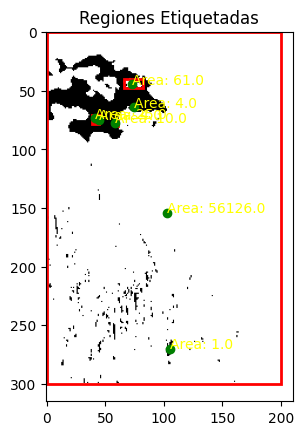

Región 1:
 - Área: 56126.0
 - Perímetro: 2949.637877203235
Región 2:
 - Área: 61.0
 - Perímetro: 38.970562748477136
Región 3:
 - Área: 4.0
 - Perímetro: 2.0
Región 4:
 - Área: 25.0
 - Perímetro: 19.071067811865476
Región 5:
 - Área: 4.0
 - Perímetro: 4.0
Región 6:
 - Área: 10.0
 - Perímetro: 9.035533905932738
Región 7:
 - Área: 1.0
 - Perímetro: 0.0


In [133]:
from skimage import measure, io
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Cargar una imagen binaria (por ejemplo, una simple imagen de formas geométricas)
image = io.imread('.jpg', as_gray=True)
binary_image = image > 0.5

# Etiquetar las regiones en la imagen binaria
label_image = measure.label(binary_image)

# Calcular las propiedades de las regiones etiquetadas
regions = measure.regionprops(label_image)

# Mostrar la imagen con las regiones etiquetadas y sus propiedades
fig, ax = plt.subplots()
ax.imshow(binary_image, cmap='gray')
ax.set_title('Regiones Etiquetadas')

for region in regions:
    # Dibujar el perímetro de cada región
    minr, minc, maxr, maxc = region.bbox
    rect = patches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    
    # Mostrar el área y el centroide de la región
    ax.text(region.centroid[1], region.centroid[0], f'Area: {region.area}', color='yellow')
    ax.plot(region.centroid[1], region.centroid[0], 'go')

plt.show()

# Imprimir las propiedades de las regiones
for i, region in enumerate(regions):
    print(f"Región {i+1}:")
    print(f" - Área: {region.area}")
    print(f" - Perímetro: {region.perimeter}")
    print


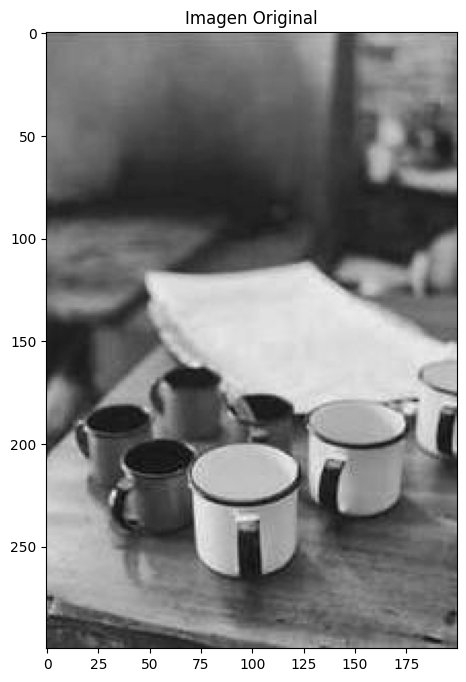

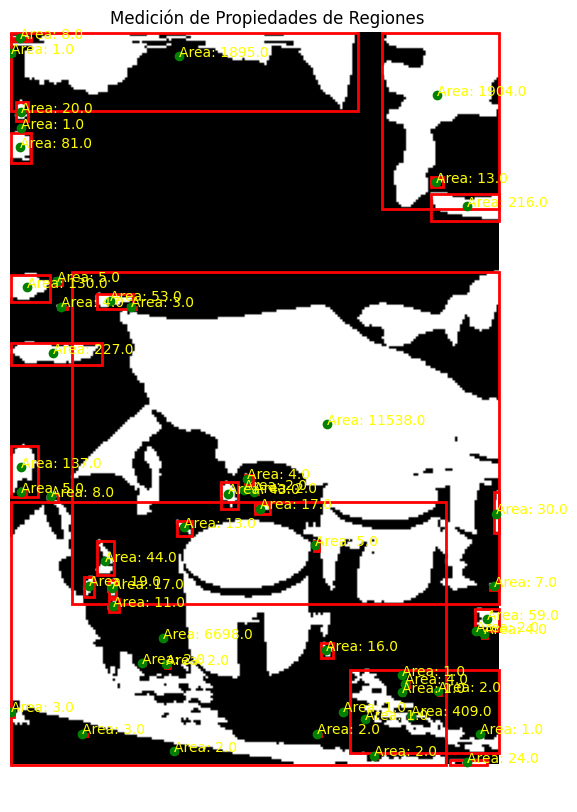

Región 1:
 - Área: 1895.0
 - Perímetro: 452.6873375215418
 - Centroide: (np.float64(9.279683377308707), np.float64(68.84168865435356))
 - Bounding Box: (0, 0, 32, 142)

Región 2:
 - Área: 1904.0
 - Perímetro: 282.095454429505
 - Centroide: (np.float64(25.462710084033613), np.float64(174.4889705882353))
 - Bounding Box: (0, 152, 72, 200)

Región 3:
 - Área: 8.0
 - Perímetro: 6.0
 - Centroide: (np.float64(2.0), np.float64(3.5))
 - Bounding Box: (2, 0, 3, 8)

Región 4:
 - Área: 1.0
 - Perímetro: 0.0
 - Centroide: (np.float64(8.0), np.float64(0.0))
 - Bounding Box: (8, 0, 9, 1)

Región 5:
 - Área: 20.0
 - Perímetro: 15.106601717798211
 - Centroide: (np.float64(32.3), np.float64(4.0))
 - Bounding Box: (28, 2, 36, 7)

Región 6:
 - Área: 1.0
 - Perímetro: 0.0
 - Centroide: (np.float64(39.0), np.float64(4.0))
 - Bounding Box: (39, 4, 40, 5)

Región 7:
 - Área: 81.0
 - Perímetro: 33.44974746830583
 - Centroide: (np.float64(46.5679012345679), np.float64(3.419753086419753))
 - Bounding Box: (41, 

In [141]:
from skimage import io, measure, morphology, color
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Cargar una imagen binaria (ejemplo con una imagen simple)

image = io.imread('.jpg', as_gray=True)
fig = plt.figure(figsize=(12, 8))
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')

# Convertir la imagen a binaria
binary_image = image > 0.5

# Etiquetar las regiones en la imagen binaria
label_image = measure.label(binary_image)

# Calcular las propiedades de las regiones etiquetadas
regions = measure.regionprops(label_image)

# Mostrar la imagen con las regiones etiquetadas y sus propiedades
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(binary_image, cmap='gray')

for region in regions:
    # Dibujar el perímetro de cada región
    minr, minc, maxr, maxc = region.bbox
    rect = patches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    
    # Mostrar el área y el centroide de la región
    ax.text(region.centroid[1], region.centroid[0], f'Area: {region.area}', color='yellow')
    ax.plot(region.centroid[1], region.centroid[0], 'go')

plt.title('Medición de Propiedades de Regiones')
plt.axis('off')
plt.show()

# Imprimir las propiedades de las regiones en la consola
for i, region in enumerate(regions):
    print(f"Región {i+1}:")
    print(f" - Área: {region.area}")
    print(f" - Perímetro: {region.perimeter}")
    print(f" - Centroide: {region.centroid}")
    print(f" - Bounding Box: {region.bbox}")
    print()



# Template Matching

- Objetivo: Encontrar una subimagen específica (plantilla) dentro de una imagen más grande utilizando la técnica de coincidencia de plantillas.
- Función clave: match_template de skimage.feature, io.imread, color.rgb2gray.
- Ejercicio: Carga una imagen y selecciona una región de la misma para usarla como plantilla. Luego, encuentra la posición de la plantilla dentro de la imagen completa y visualiza el resultado.

Explicación:

- Cargar y Convertir la Imagen: La imagen se carga desde una URL y se convierte a escala de grises para simplificar el procesamiento.
- Definir la Plantilla: Una subimagen de la imagen completa se selecciona como plantilla para la coincidencia.
- Template Matching: La función match_template se utiliza para encontrar la mejor coincidencia de la plantilla dentro de la imagen completa.
- Visualización: Se muestran la plantilla, la imagen original con la coincidencia resaltada, y el mapa de resultados de la coincidencia.


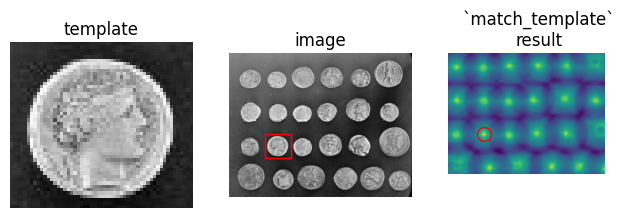

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import match_template


image = data.coins()
coin = image[170:220, 75:130]

result = match_template(image, coin)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(coin, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

Gray image shape: (300, 200)


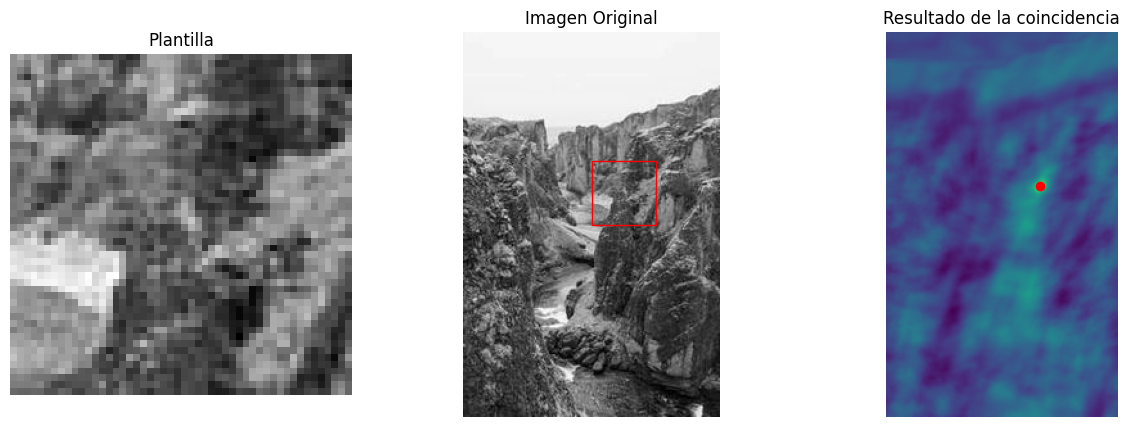

In [4]:
import matplotlib.pyplot as plt
from skimage import data, io, color, feature, transform
from skimage.feature import match_template

# Cargar la imagen y convertirla a escala de grises
image = io.imread('.jpg')
gray_image = color.rgb2gray(image)

print(f"Gray image shape: {gray_image.shape}")
# Definir la plantilla (subimagen) que se quiere encontrar
template = gray_image[100:150, 100:150]  # Recortamos un área de la imagen original como plantilla

# Realizar la coincidencia de plantillas
result = match_template(gray_image, template)

# Encontrar la posición máxima de coincidencia
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

# Mostrar la imagen y resaltar la coincidencia
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))

ax1.imshow(template, cmap='gray')
ax1.set_title('Plantilla')
ax1.axis('off')

ax2.imshow(gray_image, cmap='gray')
ax2.set_title('Imagen Original')
ax2.axis('off')
# Dibujar un rectángulo en la posición encontrada
h, w = template.shape
rect = plt.Rectangle((x, y), w, h, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result, cmap='viridis')
ax3.set_title('Resultado de la coincidencia')
ax3.axis('off')
ax3.plot(x, y, 'o', markerfacecolor='red', markeredgecolor='red')

plt.show()


# ORB Feature Detector and Binary Descriptor

- Objetivo: Detectar y describir características clave en una imagen utilizando el detector de características ORB (Oriented FAST and Rotated BRIEF).
- Función clave: feature.ORB, feature.match_descriptors.
- Ejercicio: Carga una imagen, detecta características clave utilizando ORB, y muestra las características detectadas superpuestas en la imagen original.

Este ejemplo te enseña cómo usar el detector ORB para extraer características importantes de una imagen, que pueden ser utilizadas para aplicaciones como la coincidencia de imágenes, seguimiento de objetos, y reconstrucción 3D.

/var/folders/0g/sn5q6cts08dd9rgzhjqtdkdw0000gn/T/ipykernel_66439/47827313.py:34: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(ax[0], img1, img2, keypoints1, keypoints2, matches12)
/var/folders/0g/sn5q6cts08dd9rgzhjqtdkdw0000gn/T/ipykernel_66439/47827313.py:38: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(ax[1], img1, img3, keypoints1, keypoints3, matches13)


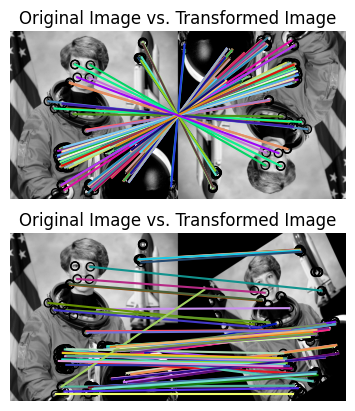

In [6]:
from skimage import data
from skimage import transform
from skimage.feature import match_descriptors, ORB, plot_matches
from skimage.color import rgb2gray
import matplotlib.pyplot as plt


img1 = rgb2gray(data.astronaut())
img2 = transform.rotate(img1, 180)
tform = transform.AffineTransform(scale=(1.3, 1.1), rotation=0.5, translation=(0, -200))
img3 = transform.warp(img1, tform)

descriptor_extractor = ORB(n_keypoints=200)

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)

fig, ax = plt.subplots(nrows=2, ncols=1)

plt.gray()

plot_matches(ax[0], img1, img2, keypoints1, keypoints2, matches12)
ax[0].axis('off')
ax[0].set_title("Original Image vs. Transformed Image")

plot_matches(ax[1], img1, img3, keypoints1, keypoints3, matches13)
ax[1].axis('off')
ax[1].set_title("Original Image vs. Transformed Image")


plt.show()